<a href="https://colab.research.google.com/github/bkgsur/FinanceModelingComputationWithPython/blob/main/Finance_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [12]:
# Plot bar plots of mean() of data
def plot_bar_plot(d):  
  print(d.head())
  d.mean().plot(kind='bar', figsize=(10,6))

In [22]:
# Import data for analysis
# Initial check
filename = 'data/tr_eikon_eod_data.csv'
f = open(filename,'r')
f.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

# Initial Data Exploration

In [4]:
# load data into pandas dataframe
data = pd.read_csv(filename, index_col=0,parse_dates=True)

In [5]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [6]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd46c0a4d0>,
      dtype=object)

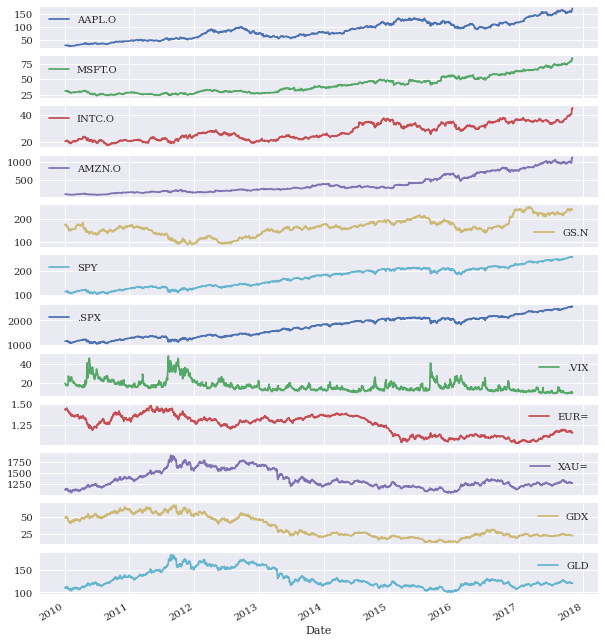

In [7]:
# Visualize data
data.plot(figsize=(10,12), subplots=True)

In [8]:
# Friendly names of imported columns
instruments = ['Apple Stock', 'Microsoft Stock', 'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock', 'SPDR S&P 500 ETF Trust', 'S&P 500 Index', 'VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price', 'VanEck Vectors Gold Miners ETF', 'SPDR Gold Trust']
data.rename(columns={ric:name for ric, name in zip(data.columns, instruments)}, inplace=True)
# get meta information
data.info()
# statistics per column
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Apple Stock                     1972 non-null   float64
 1   Microsoft Stock                 1972 non-null   float64
 2   Intel Stock                     1972 non-null   float64
 3   Amazon Stock                    1972 non-null   float64
 4   Goldman Sachs Stock             1972 non-null   float64
 5   SPDR S&P 500 ETF Trust          1972 non-null   float64
 6   S&P 500 Index                   1972 non-null   float64
 7   VIX Volatility Index            1972 non-null   float64
 8   EUR/USD Exchange Rate           1972 non-null   float64
 9   Gold Price                      1972 non-null   float64
 10  VanEck Vectors Gold Miners ETF  1972 non-null   float64
 11  SPDR Gold Trust                 1972 non-null   float64
dtypes: float64(12)
m

,Apple Stock,Microsoft Stock,Intel Stock,Amazon Stock,Goldman Sachs Stock,SPDR S&P 500 ETF Trust,S&P 500 Index,VIX Volatility Index,EUR/USD Exchange Rate,Gold Price,VanEck Vectors Gold Miners ETF,SPDR Gold Trust
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


# Changes over time

            Apple Stock  ...  SPDR Gold Trust
Date                     ...                 
2010-01-04          NaN  ...              NaN
2010-01-05     0.052857  ...            -0.10
2010-01-06    -0.487142  ...             1.81
2010-01-07    -0.055714  ...            -0.69
2010-01-08     0.200000  ...             0.55

[5 rows x 12 columns]


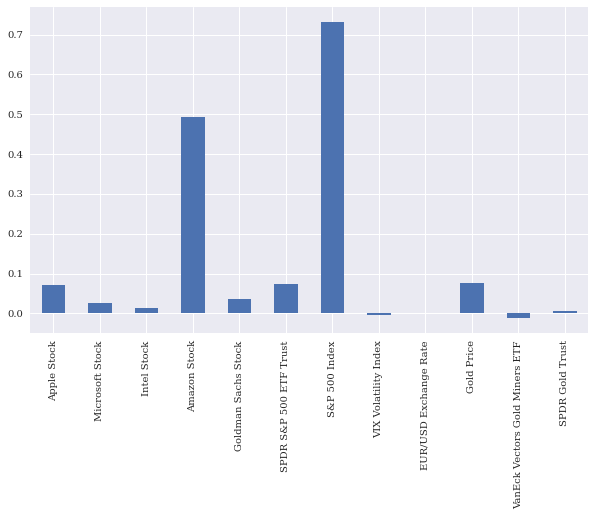

In [13]:
# Absolute diferences in values
plot_bar_plot(data.diff())

            Apple Stock  ...  SPDR Gold Trust
Date                     ...                 
2010-01-04          NaN  ...              NaN
2010-01-05     0.001729  ...        -0.000911
2010-01-06    -0.015906  ...         0.016500
2010-01-07    -0.001849  ...        -0.006188
2010-01-08     0.006648  ...         0.004963

[5 rows x 12 columns]


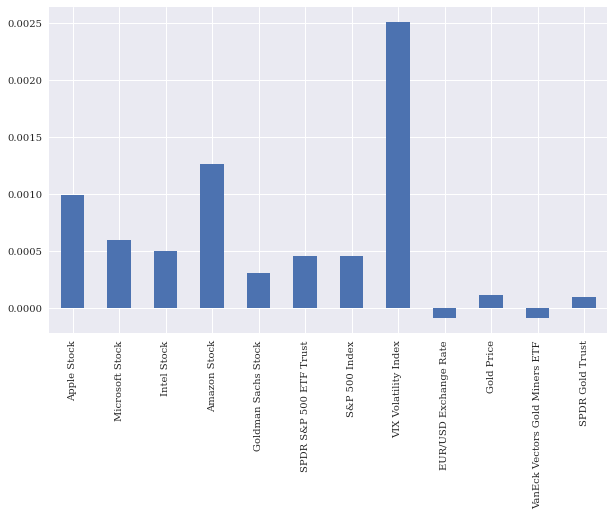

In [14]:
# Percent change in difference
plot_bar_plot(data.pct_change())


            Apple Stock  ...  SPDR Gold Trust
Date                     ...                 
2010-01-04          NaN  ...              NaN
2010-01-05         0.00  ...            -0.00
2010-01-06        -0.02  ...             0.02
2010-01-07        -0.00  ...            -0.01
2010-01-08         0.01  ...             0.00

[5 rows x 12 columns]


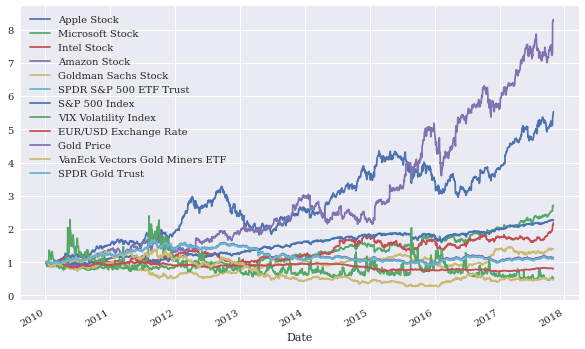

In [59]:
# Log returns
diff_log_rets = np.log(data/data.shift(1))
print(diff_log_rets.head().round(2))
#cumulative log returns 
cum_diff_log_returns = diff_log_rets.cumsum().apply(np.exp)
cum_diff_log_returns.plot(figsize=(10,6))

#Resampling

In [58]:
# resample 1 week - right value
print("One week data resample")
one_w_resample=data.resample('1w', label='right').last()
print(one_w_resample.head())
print("One month data resample")
one_m_resample =  data.resample("1m", label='right').last()
print(one_m_resample)



One week data resample
            Apple Stock  ...  SPDR Gold Trust
Date                     ...                 
2010-01-10    30.282827  ...           111.37
2010-01-17    29.418542  ...           110.86
2010-01-24    28.249972  ...           107.17
2010-01-31    27.437544  ...           105.96
2010-02-07    27.922829  ...           104.68

[5 rows x 12 columns]
One month data resample
            Apple Stock  ...  SPDR Gold Trust
Date                     ...                 
2010-01-31    27.437544  ...          105.960
2010-02-28    29.231399  ...          109.430
2010-03-31    33.571395  ...          108.950
2010-04-30    37.298534  ...          115.360
2010-05-31    36.697106  ...          118.881
...                 ...  ...              ...
2017-06-30   144.020000  ...          118.020
2017-07-31   148.730000  ...          120.750
2017-08-31   164.000000  ...          125.820
2017-09-30   154.120000  ...          121.580
2017-10-31   169.040000  ...          120.670

[94 rows 